In [1]:
import pandas as pd

from project.model import get_inputs
from project.utils import make_plot

In [2]:
output = get_inputs(variables=['buildings'])
buildings = output['buildings']

2022-11-18 14:15:02,524 - 13717 - log_ - INFO - Creating AgentBuildings object


In [9]:
heat = pd.Series({year: buildings.heating_need(climate=year, hourly=False).sum() for year in range(1990, 2010)})

In [10]:
heat

1990    2.514090e+11
1991    3.015465e+11
1992    2.902079e+11
1993    2.896129e+11
1994    2.540890e+11
1995    2.719581e+11
1996    3.100973e+11
1997    2.697990e+11
1998    2.861541e+11
1999    2.708522e+11
2000    2.605236e+11
2001    2.760011e+11
2002    2.433644e+11
2003    2.812416e+11
2004    2.858329e+11
2005    2.829103e+11
2006    2.669544e+11
2007    2.521099e+11
2008    2.828636e+11
2009    2.801065e+11
dtype: float64

In [5]:
heating_need = buildings.heating_need(climate=2006)
heating_need_smooth = buildings.heating_need(climate=2006, smooth=True)
heating_need = heating_need.sum(axis=1)
heating_need_smooth = heating_need_smooth.sum(axis=1)

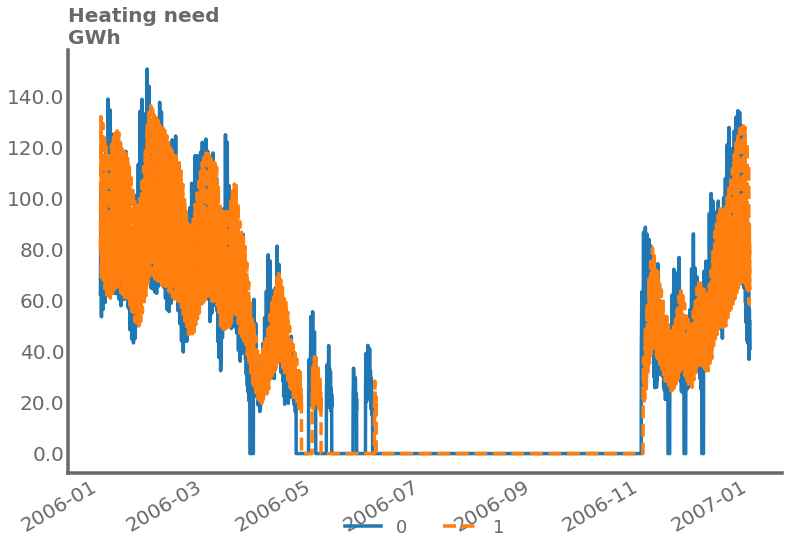

In [4]:
make_plot(pd.concat((heating_need, heating_need_smooth), axis=1) / 10**6, 'Heating need (GWh)', integer=False, ymin=None)

In [ ]:
heating_consumption